In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [1]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 542kB 3.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=498dc6935008b07f96dafae994b650438a41db35830fa9d2a1de95d8163c542b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning") #디렉토리 지정하기 거기서 파일 가져오는 거고
from dataset.mnist import load_mnist


In [4]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/ch04")
from two_layer_net import TwoLayerNet

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
np.shape(x_train)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_01 = []
test_acc_01 = []

iter_per_epoch = max(train_size / batch_size, 1)

print("[batchsize={0} / 1epoch={1} / iteration={2} / learning rate={3}]".format(batch_size,iter_per_epoch,iters_num,learning_rate))
for i in range(iters_num):
    # 미니배치 획득
    batch_selection = np.random.choice(train_size, batch_size) #100개의 무작위 자연수가 나오지
    x_batch = x_train[batch_selection]
    t_batch = t_train[batch_selection]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산 : 1 epoch = 훈련데이터를 모두 보여주는 횟수
    if (i>=600) & (i % iter_per_epoch == 0): #itter_per_epoch=600 그래서 i가 iteration이 600번씩 끝날 때마다 기록하게 하는거지.
        
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_01.append(train_acc)
        test_acc_01.append(test_acc)
        print("{0}. train acc, test acc :  ".format(i) + str(train_acc) + ", " + str(test_acc))



[batchsize=100 / 1epoch=600.0 / iteration=10000 / learning rate=0.1]
600. train acc, test acc :  0.7874833333333333, 0.7941
1200. train acc, test acc :  0.876, 0.8804
1800. train acc, test acc :  0.8986, 0.904
2400. train acc, test acc :  0.90915, 0.9127
3000. train acc, test acc :  0.9157333333333333, 0.9178
3600. train acc, test acc :  0.9203666666666667, 0.9225
4200. train acc, test acc :  0.9247833333333333, 0.9275
4800. train acc, test acc :  0.9288333333333333, 0.9312
5400. train acc, test acc :  0.9317166666666666, 0.9341
6000. train acc, test acc :  0.93495, 0.9361
6600. train acc, test acc :  0.9372, 0.9363
7200. train acc, test acc :  0.93965, 0.9389
7800. train acc, test acc :  0.9420333333333333, 0.9409
8400. train acc, test acc :  0.9440333333333333, 0.9436
9000. train acc, test acc :  0.94545, 0.9435
9600. train acc, test acc :  0.94735, 0.9457


In [ ]:
epoch_list=np.arange(1,np.size(train_acc_01)+1)


In [ ]:
iters_num = 10000  #+ 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.01

train_loss_list2 = []
train_acc_001 = []
test_acc_001 = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

print("[batchsize={0} / 1epoch={1} / iteration={2} / learning rate={3}]".format(batch_size,iter_per_epoch,iters_num,learning_rate))
for i in range(iters_num):
    # 미니배치 획득
    batch_selection = np.random.choice(train_size, batch_size) #100개의 무작위 자연수가 나오지
    x_batch = x_train[batch_selection]
    t_batch = t_train[batch_selection]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list2.append(loss)
    
    # 1에폭당 정확도 계산 : 1 epoch = 훈련데이터 사이즈 / 미니배치 사이즈
    if (i>=600) & (i % iter_per_epoch == 0): #itter_per_epoch=600 그래서 i가 iteration이 600번씩 끝날 때마다 기록하게 하는거지.
        #총 훈련데이터는 60,000개, 미니배치 100개 iteration 100번
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_001.append(train_acc)
        test_acc_001.append(test_acc)
        print("{0}. train acc, test acc :  ".format(i) + str(train_acc) + ", " + str(test_acc))

[batchsize=100 / 1epoch=600.0 / iteration=10000 / learning rate=0.01]
600. train acc, test acc :  0.2781, 0.2811
1200. train acc, test acc :  0.37303333333333333, 0.3689
1800. train acc, test acc :  0.4984, 0.5008
2400. train acc, test acc :  0.58525, 0.5936
3000. train acc, test acc :  0.6537333333333334, 0.6599
3600. train acc, test acc :  0.7052666666666667, 0.7118
4200. train acc, test acc :  0.7561833333333333, 0.7595
4800. train acc, test acc :  0.78745, 0.7897
5400. train acc, test acc :  0.8050833333333334, 0.8075
6000. train acc, test acc :  0.82205, 0.8249
6600. train acc, test acc :  0.8337, 0.8376
7200. train acc, test acc :  0.8441333333333333, 0.8478
7800. train acc, test acc :  0.8513333333333334, 0.8561
8400. train acc, test acc :  0.8587833333333333, 0.8634
9000. train acc, test acc :  0.8643833333333333, 0.8684
9600. train acc, test acc :  0.8701333333333333, 0.8743


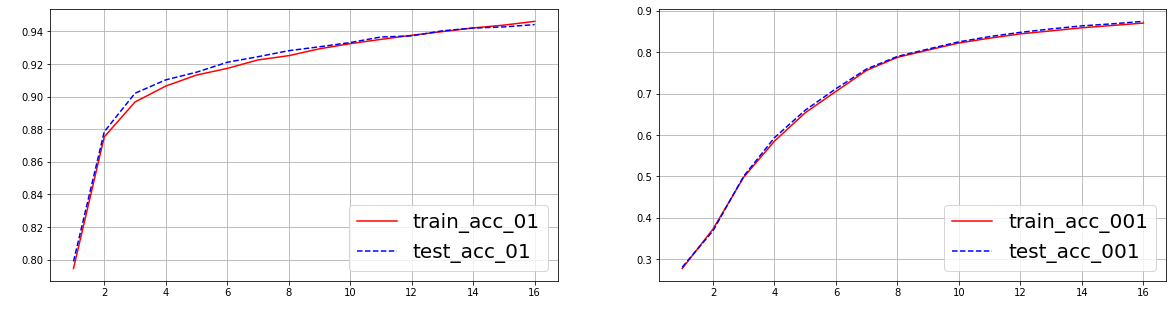

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
names=np.array([["train_acc_01","test_acc_01"],["train_acc_001","test_acc_001"]])
lists=np.array(((train_acc_01,test_acc_01),(train_acc_001,test_acc_001)))
lr_list=np.array(["Learningrate=0.01","Learningrate=0.01"])

epoch_list
lists[0,0]
for i,ax in zip([0,1],axes):
  ax.plot(epoch_list, lists[i,0],label=names[i,0],linestyle="-",color='red')
  ax.plot(epoch_list, lists[i,1],label=names[i,1],linestyle="--",color='blue')
  ax.set_xlabel("Epochs",fontsize=10,color="white")
  ax.set_ylabel("Accuracy",fontsize=10,color="white")
  ax.legend(loc=4,fontsize=20)
  ax.grid()


'train_acc_005'